# This is an exercise in Mardown
## Working with the WHO world suicide rates dataset

In [1]:
#import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#read in the csv file
df = pd.read_csv('master.csv')

In [2]:
#look at the data frame
print(df.columns)
df.head(5)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#get a list of unique years
df['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

## Compare total population growth with total GDP.

### While the world population increased in the period from 1985 to 2015, the total world GDP remained relatively flat.

In [74]:
grouped_pop = df.groupby(by = ['year']).sum()
#print(grouped_pop)

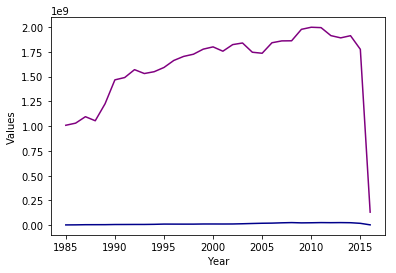

In [73]:
plt.plot(grouped_pop['population'], color = 'purple')
plt.plot(grouped_pop['gdp_per_capita ($)'], color = 'darkblue')
plt.ylabel('Values')
plt.xlabel('Year')

plt.show()

## Plotting the total number of suicides per year by gender

### Organize data set by gender and year and compute average number of suicides per group per year

In [36]:
#group by gender, year
group_by_gen_yr = df.groupby(by = ['sex', 'year']).mean().plot(kind = barh,)

#calculate average by group by
df_avg = group_by_gen_yr.mean()
#print(df_avg)

### Separate the data frame into male and female data sets

In [3]:
#separate into averages for just men by year
#print(df_avg.columns)
df_men = df[df['sex'] == 'male']
#print(df_men)
df_men_grp = df_men.groupby(by = ['year'])
df_men_avg = df_men_grp.mean()
#print(df_men_avg)

#women
df_women = df[df['sex'] == 'female']
df_women_grp = df_women.groupby(by = ['year'])
df_women_avg = df_women_grp.mean()
#print(df_women_avg)

### Render the plot
#### The graph below reveals that for each year in the data sets males have on average many more suicides per year than females.

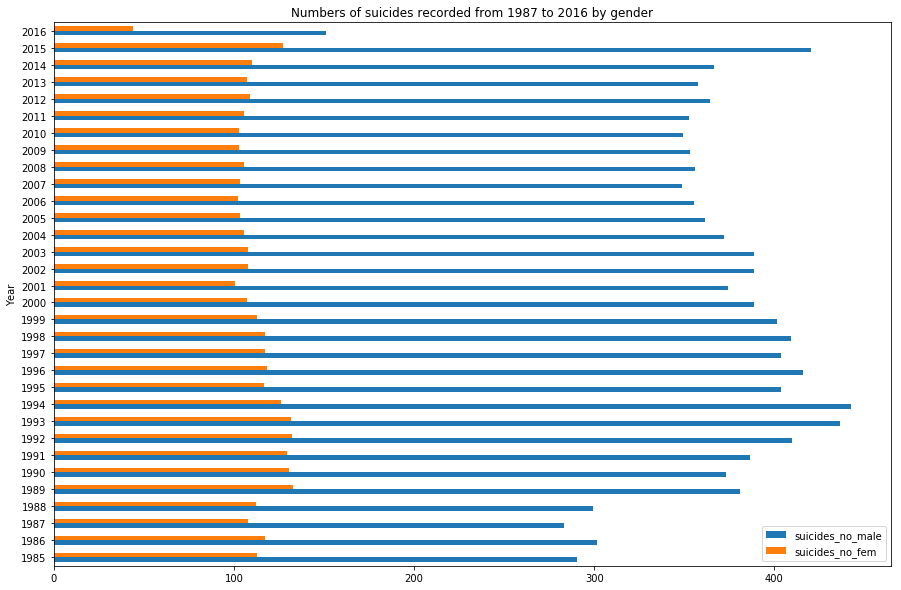

In [4]:
#combine averages into data frame
new_df = df_men_avg.merge(df_women_avg, left_index = True, right_index = True, suffixes = ['_male', '_fem'])
#print(new_df)

#graph
new_df[['suicides_no_male', 
           'suicides_no_fem']].sort_values(by = [#'suicides_no_male', 'suicides_no_fem'
                                                'year'], ascending = True).plot(kind = 'barh', figsize = (15,10))
plt.title("Numbers of suicides recorded from 1987 to 2016 by gender")
plt.ylabel("Year")
plt.show()

### Splitting the plot up by decade allows a clearer understanding of the trend.

In [44]:
#maybe split into diff plots by decade????
df_80 = df[(df['year'] >= 1980) & (df['year'] <= 1989)]
df_90 = df[(df['year'] >= 1990) & (df['year'] <= 1999)]
df_00 = df[(df['year'] >= 2000) & (df['year'] <= 2009)]
df_10 = df[(df['year'] >= 2010) & (df['year'] <= 2019)]
#print(df_10)

In [68]:
df_80_grouped = df_80.groupby(by = ['year']).sum()
#df_5_14_sum['age_grp'] = 'Ages 5 to 14'
df_90_grouped = df_90.groupby(by = ['year']).sum()
df_00_grouped = df_00.groupby(by = ['year']).sum()
df_10_grouped = df_10.groupby(by = ['year']).sum()
#print(df_10_grouped)

In [25]:
#calculate # suicides as percent of population - too low of a percentage
#df_80_grouped['suicides_percent'] = df_80_grouped['suicides_no']*100/df_80_grouped['population']
#print(df_80_grouped)

Text(0.5, 1.0, 'Number of Suicides Occuring in the 2010s by Year')

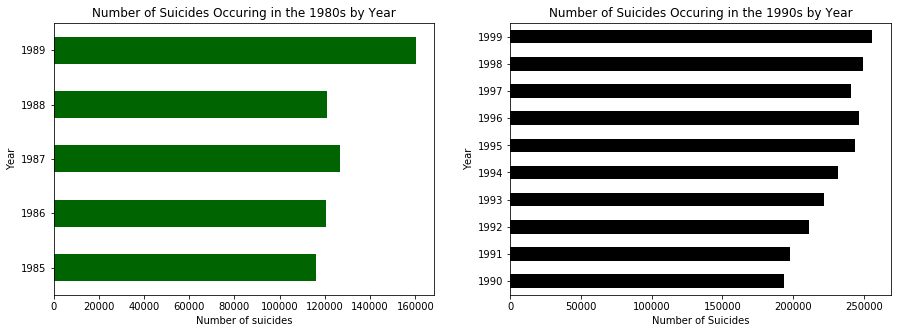

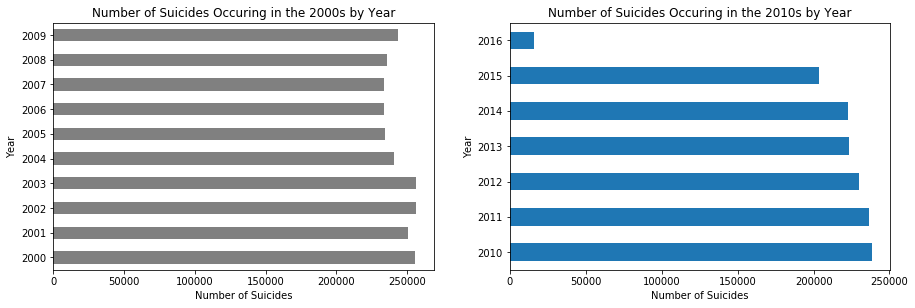

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
#plt.plot(df_80_grouped['suicides_no'], kind = 'barh', color = 'blue')
df_80_grouped['suicides_no'].plot(kind = 'barh', color = 'darkgreen')
plt.ylabel('Year')
plt.xlabel('Number of suicides')
plt.title('Number of Suicides Occuring in the 1980s by Year')

plt.subplot(1, 2, 2)
df_90_grouped['suicides_no'].plot(kind = 'barh', color = 'black')
plt.ylabel('Year')
plt.xlabel('Number of Suicides')
plt.title('Number of Suicides Occuring in the 1990s by Year')

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df_00_grouped['suicides_no'].plot(kind = 'barh', color = 'grey')
plt.ylabel('Year')
plt.xlabel('Number of Suicides')
plt.title('Number of Suicides Occuring in the 2000s by Year')

plt.subplot(2, 2, 2)
df_10_grouped['suicides_no'].plot(kind = 'barh')
plt.ylabel('Year')
plt.xlabel('Number of Suicides')
plt.title('Number of Suicides Occuring in the 2010s by Year')

## Plotting suicides by age group over time

### Split data frame by age group

In [5]:
df['age'].unique()
#print(df)

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [6]:
df_5_14 = df[df['age'] == '5-14 years']
df_15_24 = df[df['age'] == '15-24 years']
df_25_34 = df[df['age'] == '25-34 years']
df_35_54 = df[df['age'] == '35-54 years']
df_55_74 = df[df['age'] == '55-74 years']
df_75 = df[df['age'] == '75+ years']
#print(df_5_14)
#df_5_14['age'].unique()

### Get sum of suicides by year and age group

In [46]:
#df_5_14.plot(x = 'year', y = 'suicide_no', color = 'red')

In [7]:
df_5_14_age = df_5_14.groupby(by = ['year'])
df_5_14_sum = df_5_14_age.sum()
df_5_14_sum['age_grp'] = 'Ages 5 to 14'
#print(df_5_14_sum)

df_15_24_age = df_15_24.groupby(by = ['year'])
df_15_24_sum = df_15_24_age.sum()
df_15_24_sum['age_grp'] = 'Ages 15 to 24'
#print(df_15_24_sum)

df_25_34_age = df_25_34.groupby(by = ['year'])
df_25_34_sum = df_25_34_age.sum()
df_25_34_sum['age_grp'] = 'Ages 25 to 34'

df_35_54_age = df_35_54.groupby(by = ['year'])
df_35_54_sum = df_35_54_age.sum()
df_35_54_sum['age_grp'] = 'Ages 35 to 54'

df_55_74_age = df_55_74.groupby(by = ['year'])
df_55_74_sum = df_55_74_age.sum()
df_55_74_sum['age_grp'] = "Ages 55 to 74"

df_75_age = df_75.groupby(by = ['year'])
df_75_sum = df_75_age.sum()
df_75_sum['age_grp'] = "Ages 75 and over"

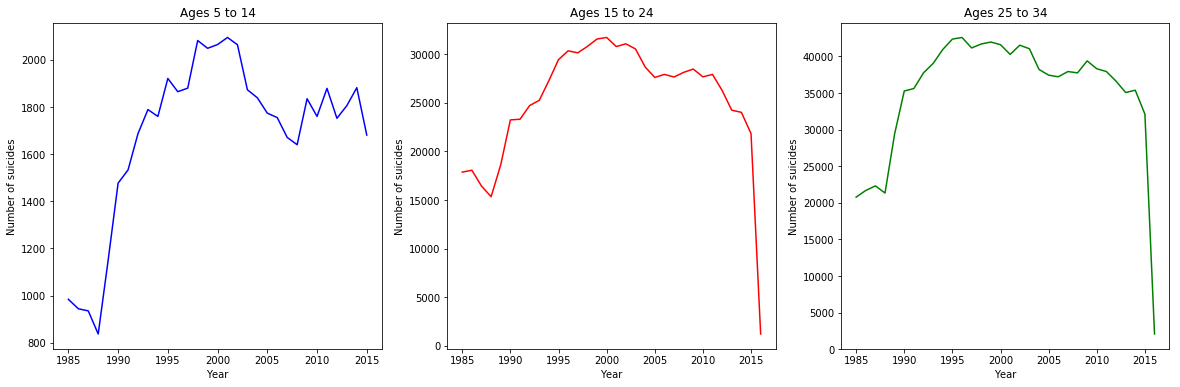

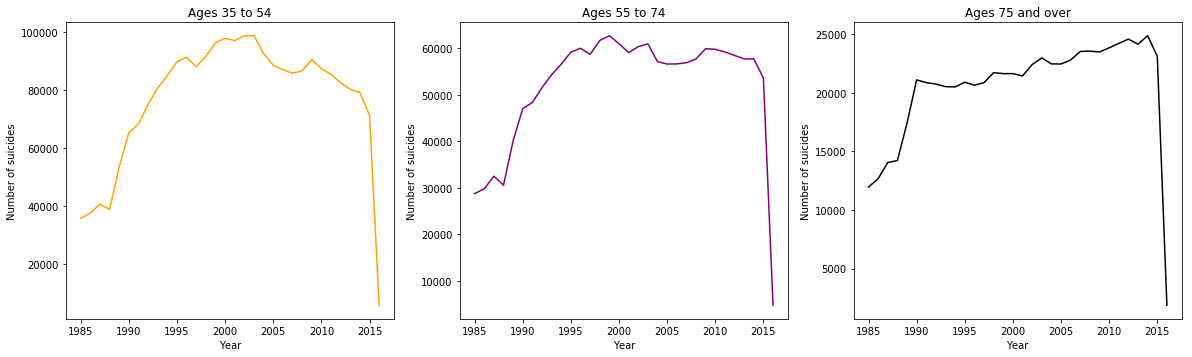

In [60]:
plt.figure(figsize = (20, 6))


plt.subplot(1, 3, 1)
plt.plot(df_5_14_sum['suicides_no'], color = 'blue')
plt.ylabel('Number of suicides')
plt.xlabel('Year')
plt.title('Ages 5 to 14')

plt.subplot(1, 3, 2)
plt.plot(df_15_24_sum['suicides_no'], color = 'red')
plt.ylabel('Number of suicides')
plt.xlabel('Year')
plt.title('Ages 15 to 24')

plt.subplot(1, 3, 3)
plt.plot(df_25_34_sum['suicides_no'], color = 'green')
plt.ylabel('Number of suicides')
plt.xlabel('Year')
plt.title('Ages 25 to 34')

plt.figure(figsize = (20, 12))
plt.subplot(2, 3, 1)
plt.plot(df_35_54_sum['suicides_no'], color = 'orange')
plt.ylabel('Number of suicides')
plt.xlabel('Year')
plt.title('Ages 35 to 54')

plt.subplot(2, 3, 2)
plt.plot(df_55_74_sum['suicides_no'], color = 'purple')
plt.ylabel('Number of suicides')
plt.xlabel('Year')
plt.title('Ages 55 to 74')

plt.subplot(2, 3, 3)
plt.plot(df_75_sum['suicides_no'], color = 'black')
plt.ylabel('Number of suicides')
plt.xlabel('Year')
plt.title('Ages 75 and over')

plt.show()